# About Dataset
### Context
### This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

carat (0.2-5.01): The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points.

cut (Fair, Good, Very Good, Premium, Ideal): The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.

color (from J (worst) to D (best)): The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

depth (43-79): It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.

table (43-95): It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.

price ($$326 - $18826): It is the price of the diamond in US dollars. It is our very target column in the dataset.
       
x (0 - 10.74): Length of the diamond (in mm)

y (0 - 58.9): Width of the diamond (in mm)

z (0 - 31.8): Depth of the diamond (in mm)

In [142]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn import metrics 

In [47]:
# Load the cvs dataset:

df = pd.read_csv('diamonds.csv')
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
df.shape

(53940, 11)

### Explore the Data 

In [49]:
# Summary Statistics
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [50]:
# Check for missing values
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Cleaning the data

In [52]:
# Drop unnamed: 0 column:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [53]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [54]:
# Convert data types if needed
df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### EDA

### Distribution of numerical Features

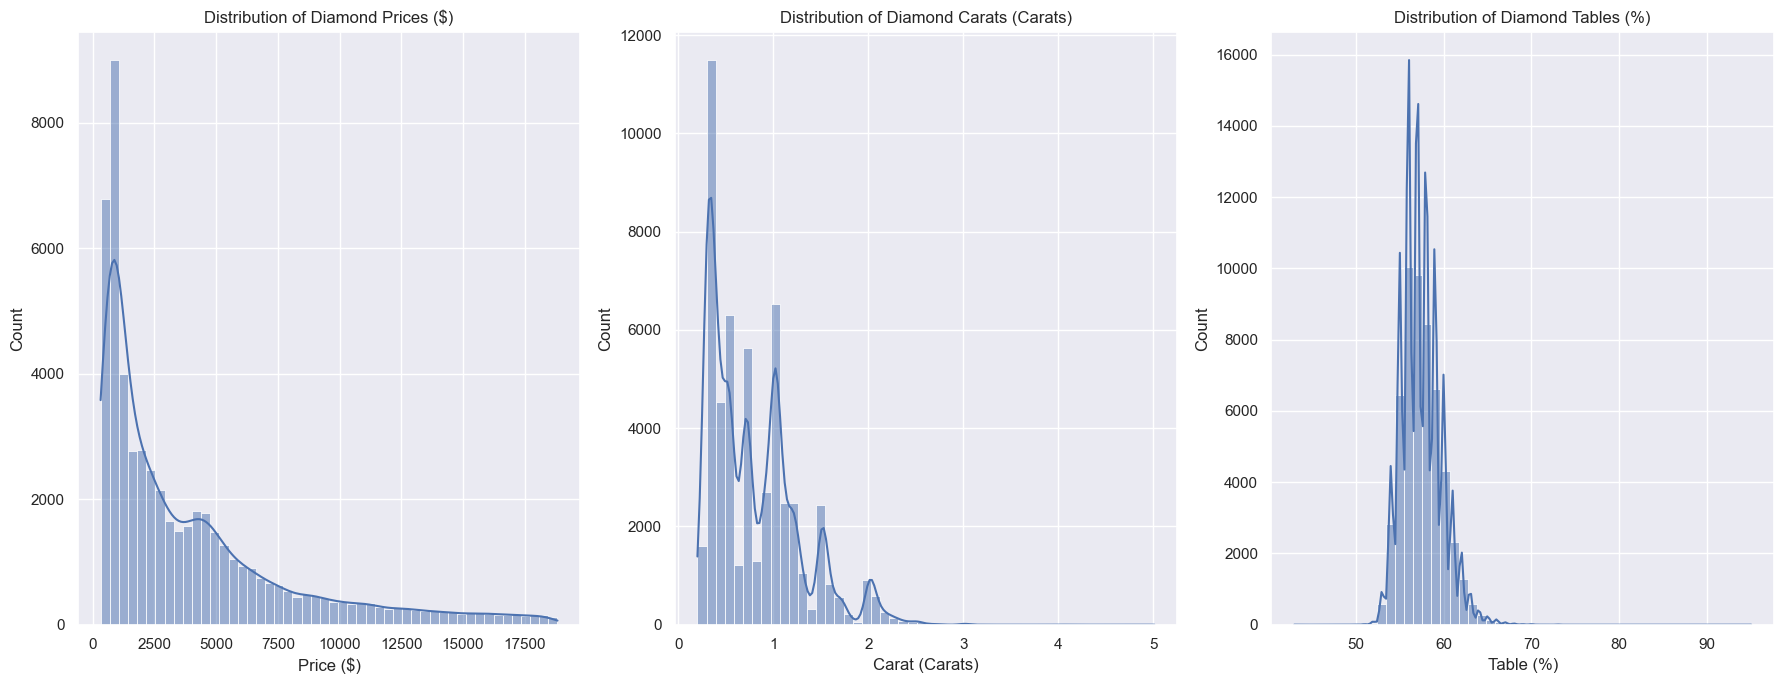

In [56]:
# Set the figure size for the entire plot
plt.figure(figsize=(18, 7))

# Plot 1: Price Distribution
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Diamond Prices ($)')
plt.xlabel('Price ($)')

# Plot 2: Carat Distribution
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(df['carat'], bins=50, kde=True)
plt.title('Distribution of Diamond Carats (Carats)')
plt.xlabel('Carat (Carats)')

# Plot 3: Table Distribution
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(df['table'], bins=50, kde=True)
plt.title('Distribution of Diamond Tables (%)')
plt.xlabel('Table (%)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
# Apply log tranformation to the price and carat features to make them more normally distributed:
df['log_price'] = np.log(df['price'])
df['log_carat'] = np.log(df['carat'])

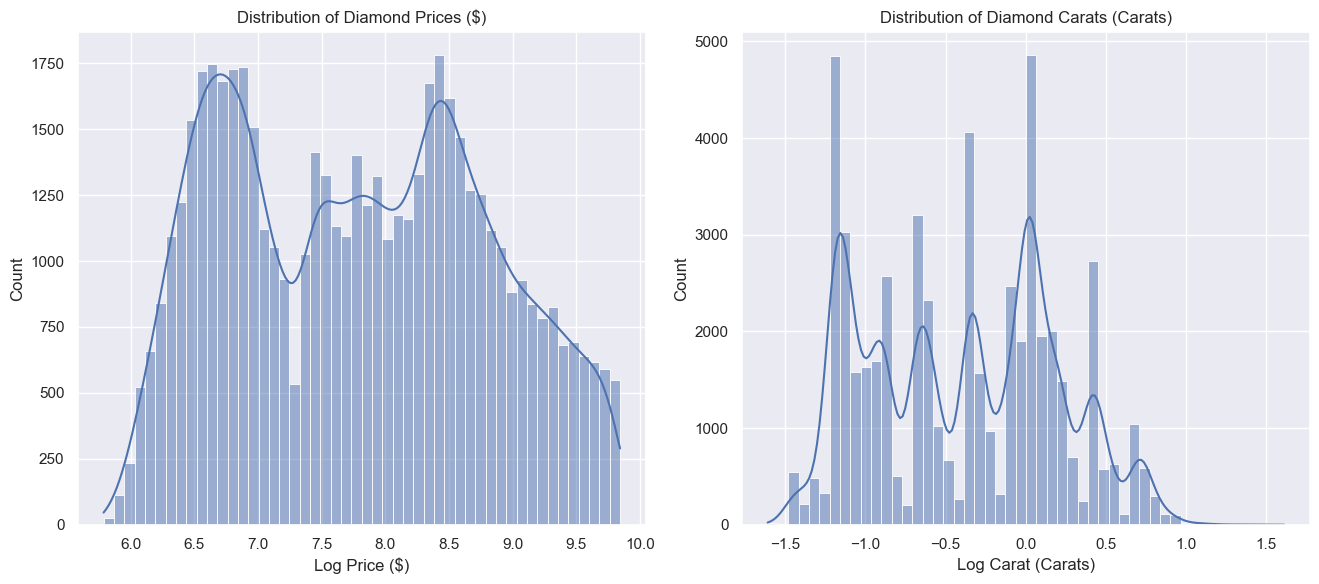

In [58]:
# Plot log_price and log_carat distributions:
# Set the figure size for the entire plot
plt.figure(figsize=(20, 6))

# Plot 1: Distribution of x
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Distribution of Diamond Prices ($)')
plt.xlabel('Log Price ($)')

# Plot 2: Distribution of y
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(df['log_carat'], bins=50, kde=True)
plt.title('Distribution of Diamond Carats (Carats)')
plt.xlabel('Log Carat (Carats)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


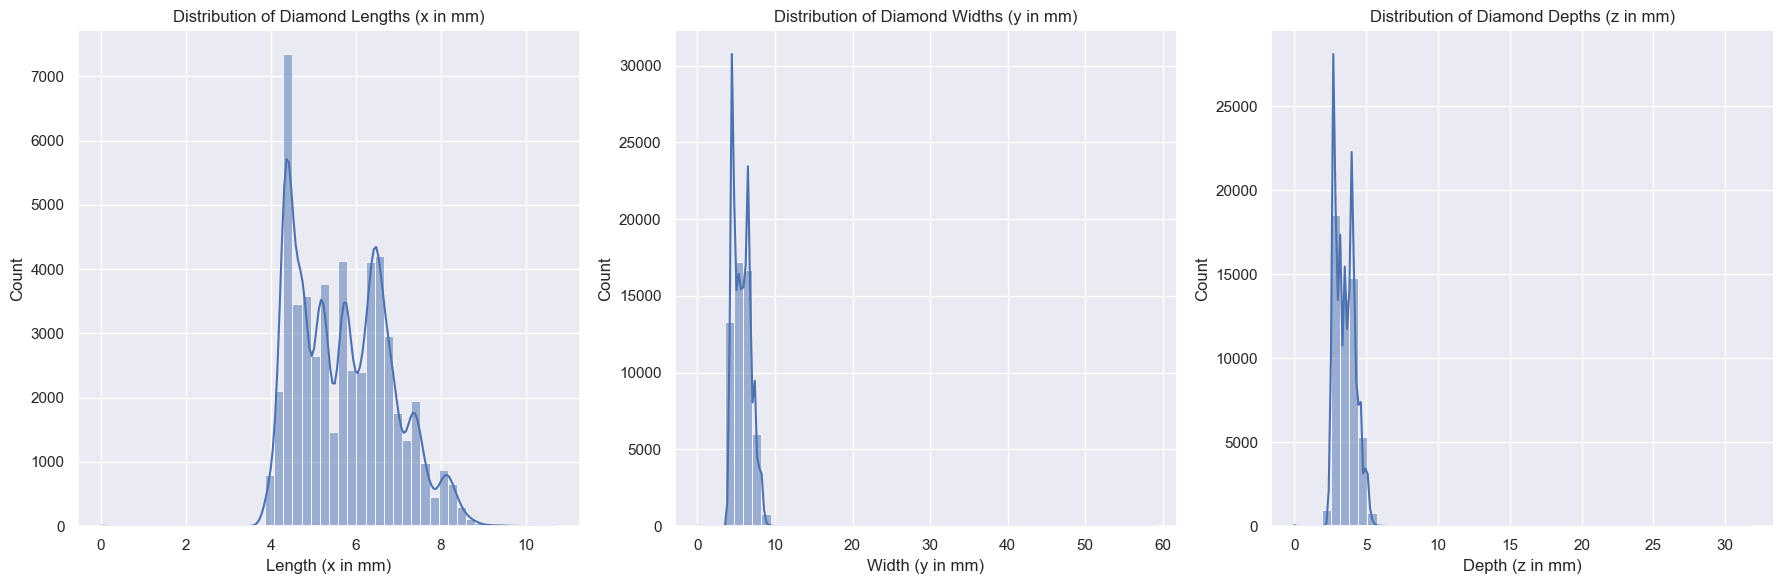

In [59]:
# Set the figure size for the entire plot
plt.figure(figsize=(18, 6))

# Plot 1: Distribution of x
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(df['x'], bins=50, kde=True)
plt.title('Distribution of Diamond Lengths (x in mm)')
plt.xlabel('Length (x in mm)')

# Plot 2: Distribution of y
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(df['y'], bins=50, kde=True)
plt.title('Distribution of Diamond Widths (y in mm)')
plt.xlabel('Width (y in mm)')

# Plot 3: Distribution of z
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(df['z'], bins=50, kde=True)
plt.title('Distribution of Diamond Depths (z in mm)')
plt.xlabel('Depth (z in mm)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

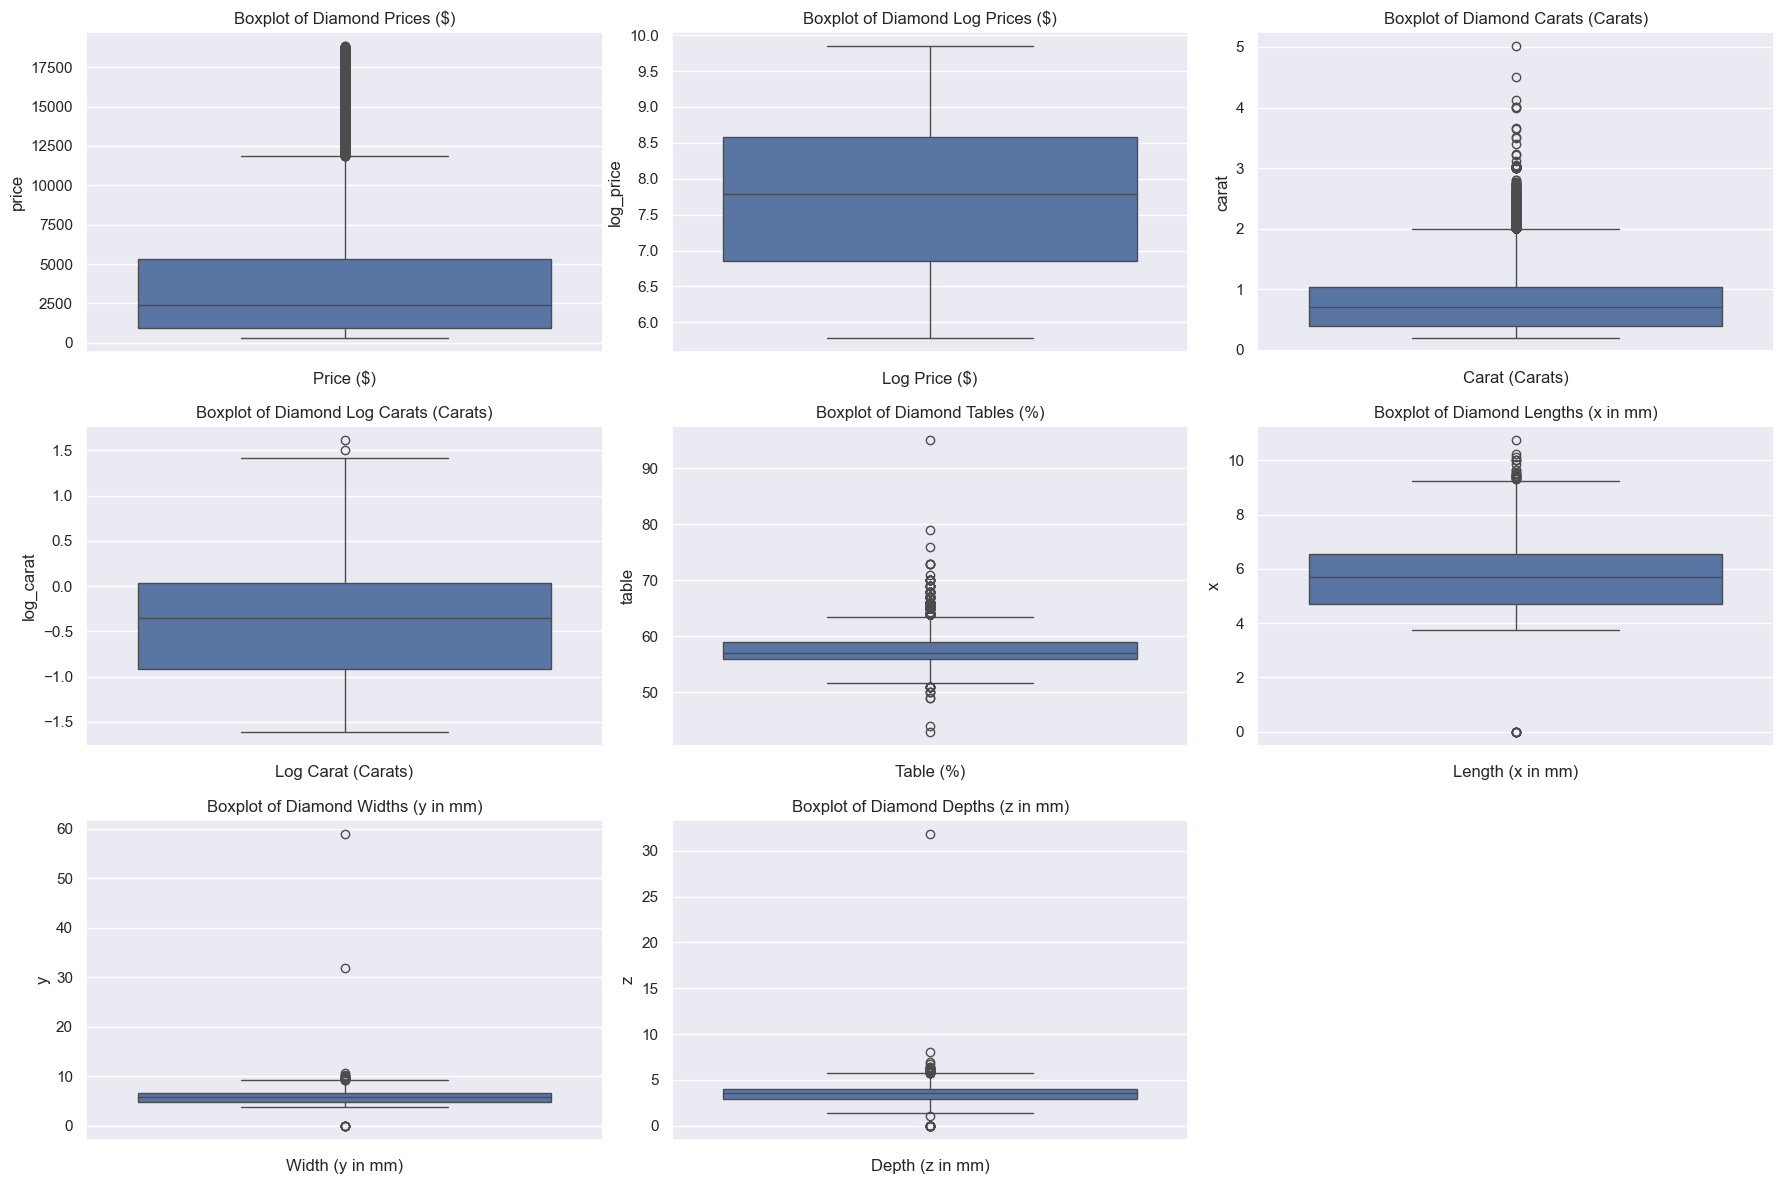

In [60]:
# Use boxplot to check outliers of price, carat, table, x, y, and z:
# Set the figure size for the entire plot
plt.figure(figsize=(18, 12))

# Plot 1: Boxplot of Price
plt.subplot(3, 3, 1) 
sns.boxplot(df['price'])
plt.title('Boxplot of Diamond Prices ($)')
plt.xlabel('Price ($)')

# Plot 2: Boxplot of log_Price
plt.subplot(3, 3, 2) 
sns.boxplot(df['log_price'])
plt.title('Boxplot of Diamond Log Prices ($)')
plt.xlabel('Log Price ($)')

# Plot 2: Boxplot of Carat
plt.subplot(3, 3, 3) 
sns.boxplot(df['carat'])
plt.title('Boxplot of Diamond Carats (Carats)')
plt.xlabel('Carat (Carats)')

# Plot 3: Boxplot of Carat
plt.subplot(3, 3, 4)
sns.boxplot(df['log_carat'])
plt.title('Boxplot of Diamond Log Carats (Carats)')
plt.xlabel('Log Carat (Carats)')

# Plot 3: Boxplot of Table
plt.subplot(3, 3, 5) 
sns.boxplot(df['table'])
plt.title('Boxplot of Diamond Tables (%)')
plt.xlabel('Table (%)')

# Plot 4: Boxplot of Length (x)
plt.subplot(3, 3, 6) 
sns.boxplot(df['x'])
plt.title('Boxplot of Diamond Lengths (x in mm)')
plt.xlabel('Length (x in mm)')

# Plot 5: Boxplot of Width (y)
plt.subplot(3, 3, 7) 
sns.boxplot(df['y'])
plt.title('Boxplot of Diamond Widths (y in mm)')
plt.xlabel('Width (y in mm)')

# Plot 6: Boxplot of Depth (z)
plt.subplot(3, 3, 8) 
sns.boxplot(df['z'])
plt.title('Boxplot of Diamond Depths (z in mm)')
plt.xlabel('Depth (z in mm)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### Relationships between numerical features

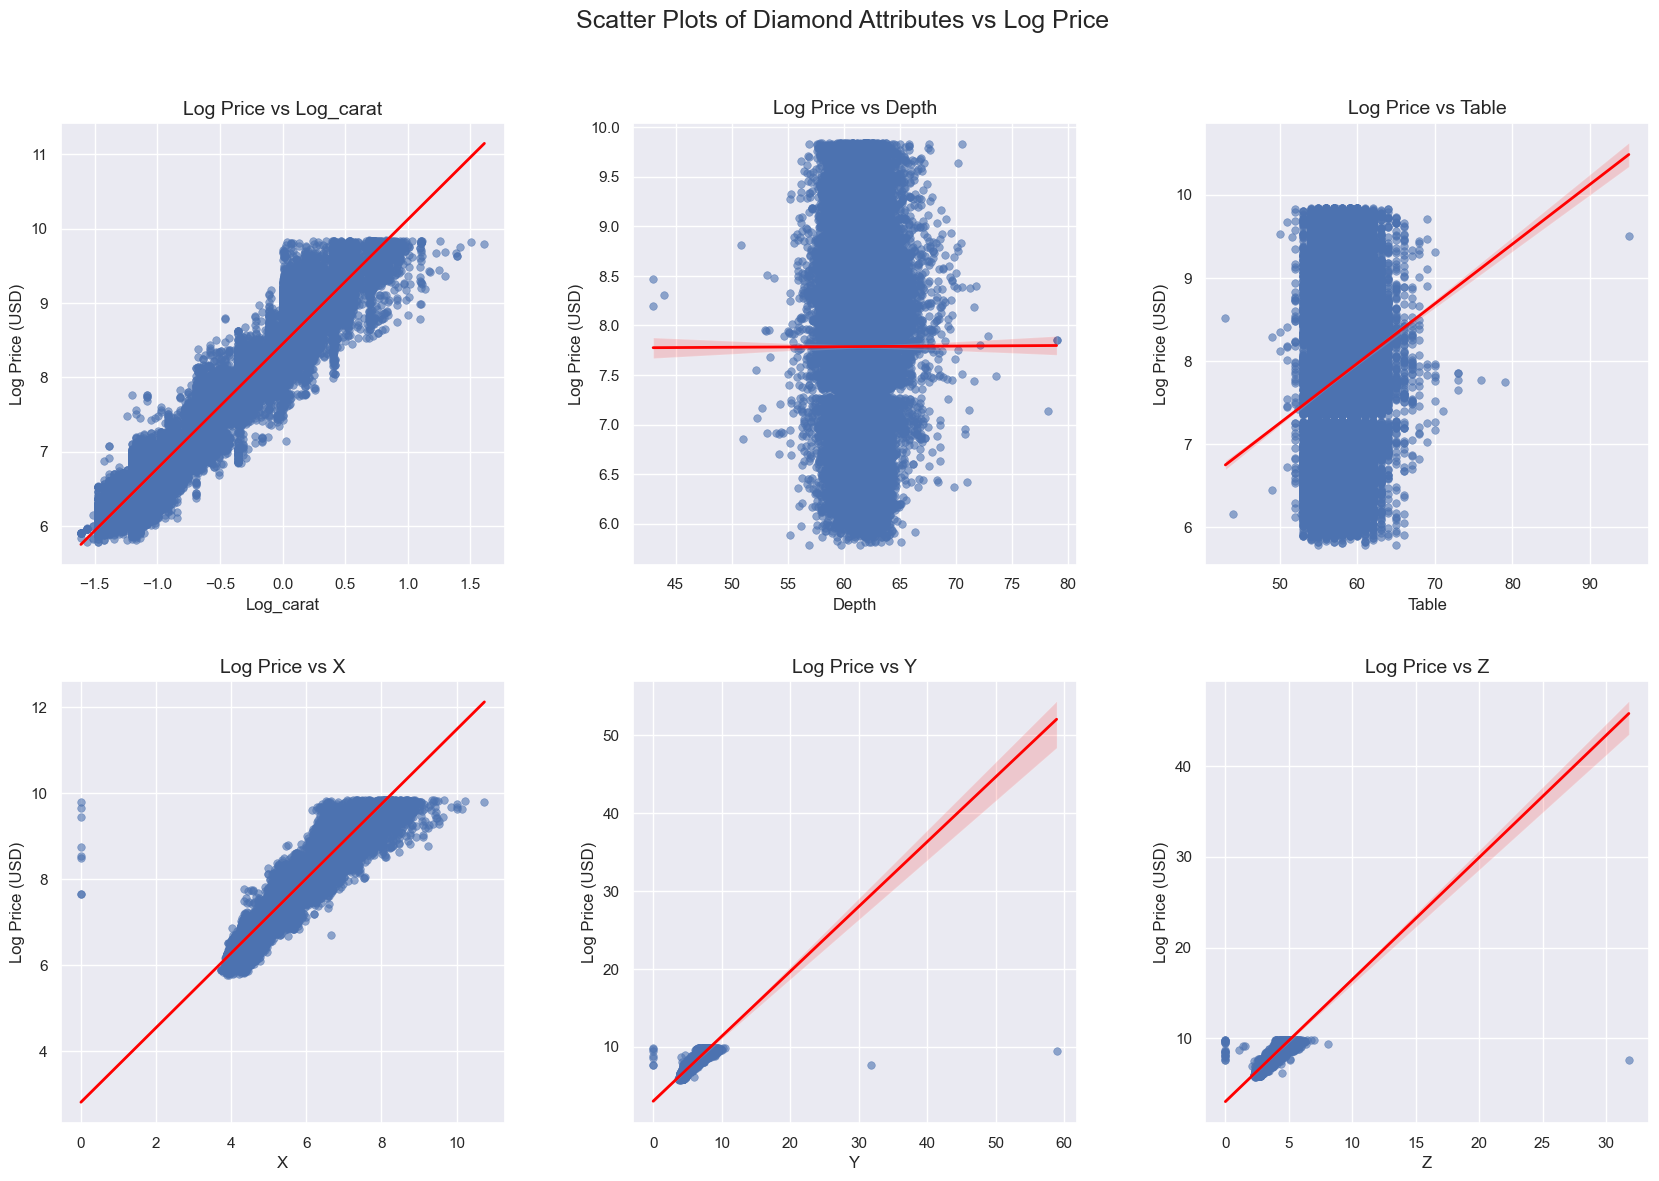

In [71]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.tight_layout(pad=5.0)  # Adjust layout

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot scatter plots for each numerical column vs price
for i, col in enumerate(['log_carat', 'depth', 'table', 'x', 'y', 'z']):
    sns.scatterplot(x=df[col], y=df['log_price'], ax=axes[i], s=30, alpha=0.6, edgecolor=None)
    
    # Add a regression line to visualize the trend
    sns.regplot(x=df[col], y=df['log_price'], ax=axes[i], scatter=False, color='red', line_kws={'linewidth': 2})
    
    # Set titles and labels
    axes[i].set_title(f'Log Price vs {col.capitalize()}', fontsize=14)
    axes[i].set_xlabel(f'{col.capitalize()}', fontsize=12)
    axes[i].set_ylabel('Log Price (USD)', fontsize=12)

# Add an overall title
fig.suptitle('Scatter Plots of Diamond Attributes vs Log Price', fontsize=18, y=1.02)

# Show the plot
plt.show()


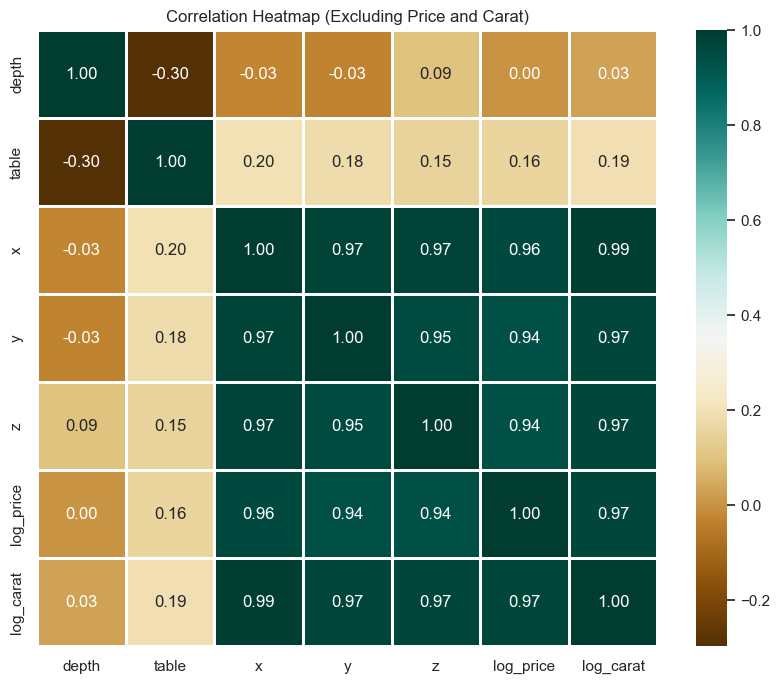

In [62]:
# Create a new DataFrame excluding 'price' and 'carat'
df_corr = df.drop(columns=['price', 'carat'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='BrBG', linewidths=2, fmt='.2f')
plt.title('Correlation Heatmap (Excluding Price and Carat)')
plt.show()


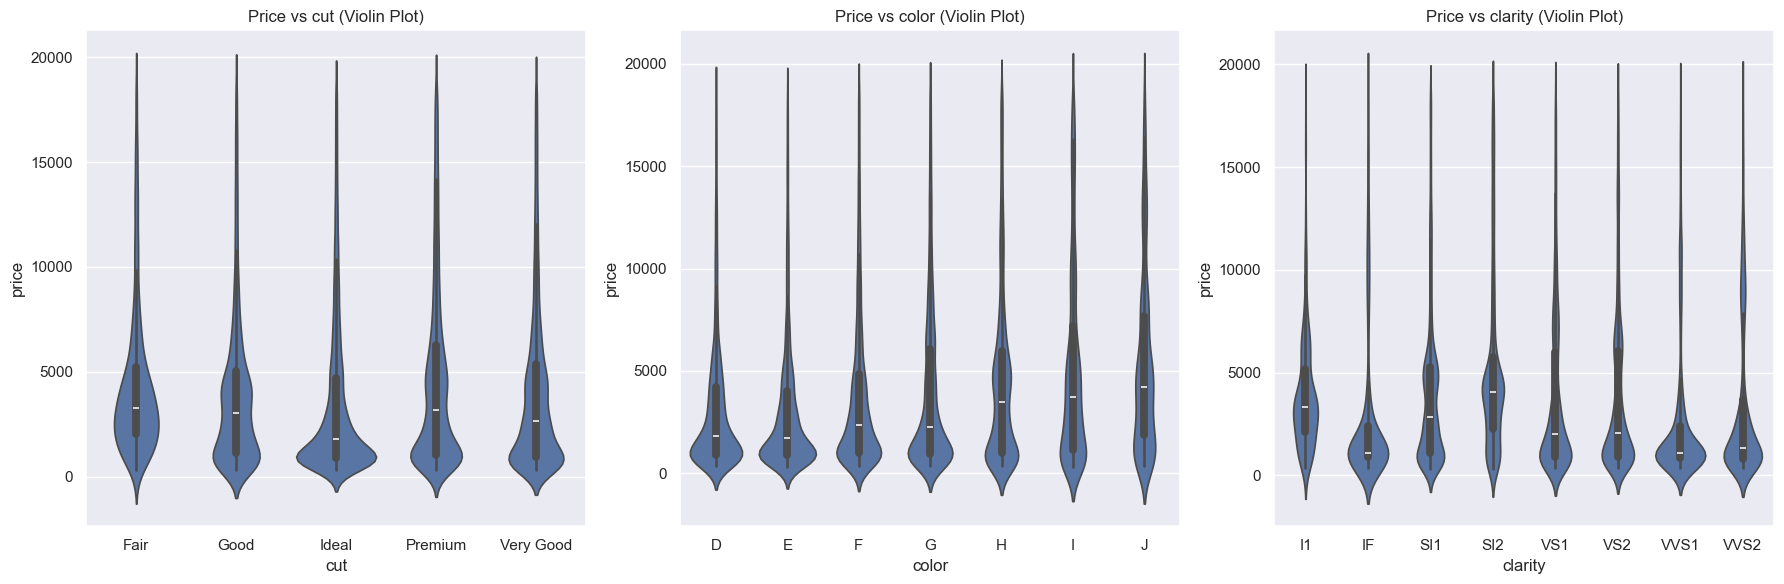

In [63]:
# Create a figure with 3 subplots, arranged in 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of categorical columns
categorical_columns = ['cut', 'color', 'clarity']

# Loop through the categorical columns and corresponding axes
for i, col in enumerate(categorical_columns):
    sns.violinplot(x=df[col], y=df['price'], ax=axes[i])
    axes[i].set_title(f'Price vs {col} (Violin Plot)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


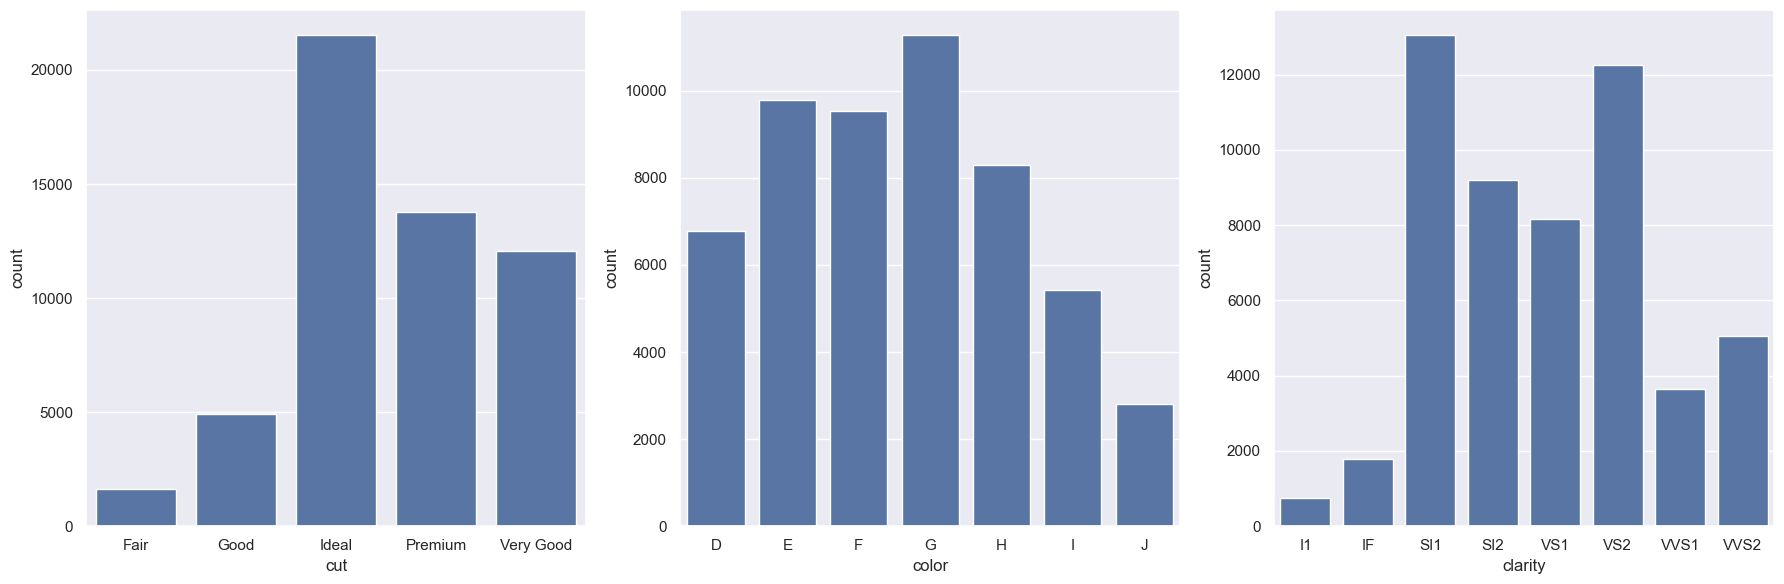

In [64]:
# Count of Diamonds by clarity, color, and cut

# Create a figure with 3 subplots, arranged in 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of categorical columns
categorical_columns = ['cut', 'color', 'clarity']

# Loop through the categorical columns and corresponding axes
for i, col in enumerate(categorical_columns):
    sns.countplot(x= df[col], ax = axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Color: D, E, F, G, H, I, J (From the best to the worst)
# Clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (From the worst to the best)

In [65]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'log_price', 'log_carat'],
      dtype='object')

In [66]:
# Reorder the columns:
col = [ 'cut', 'color', 'clarity', 'depth', 'table',  'x', 'y',
       'z','price', 'carat','log_price', 'log_carat']

df = df[col]

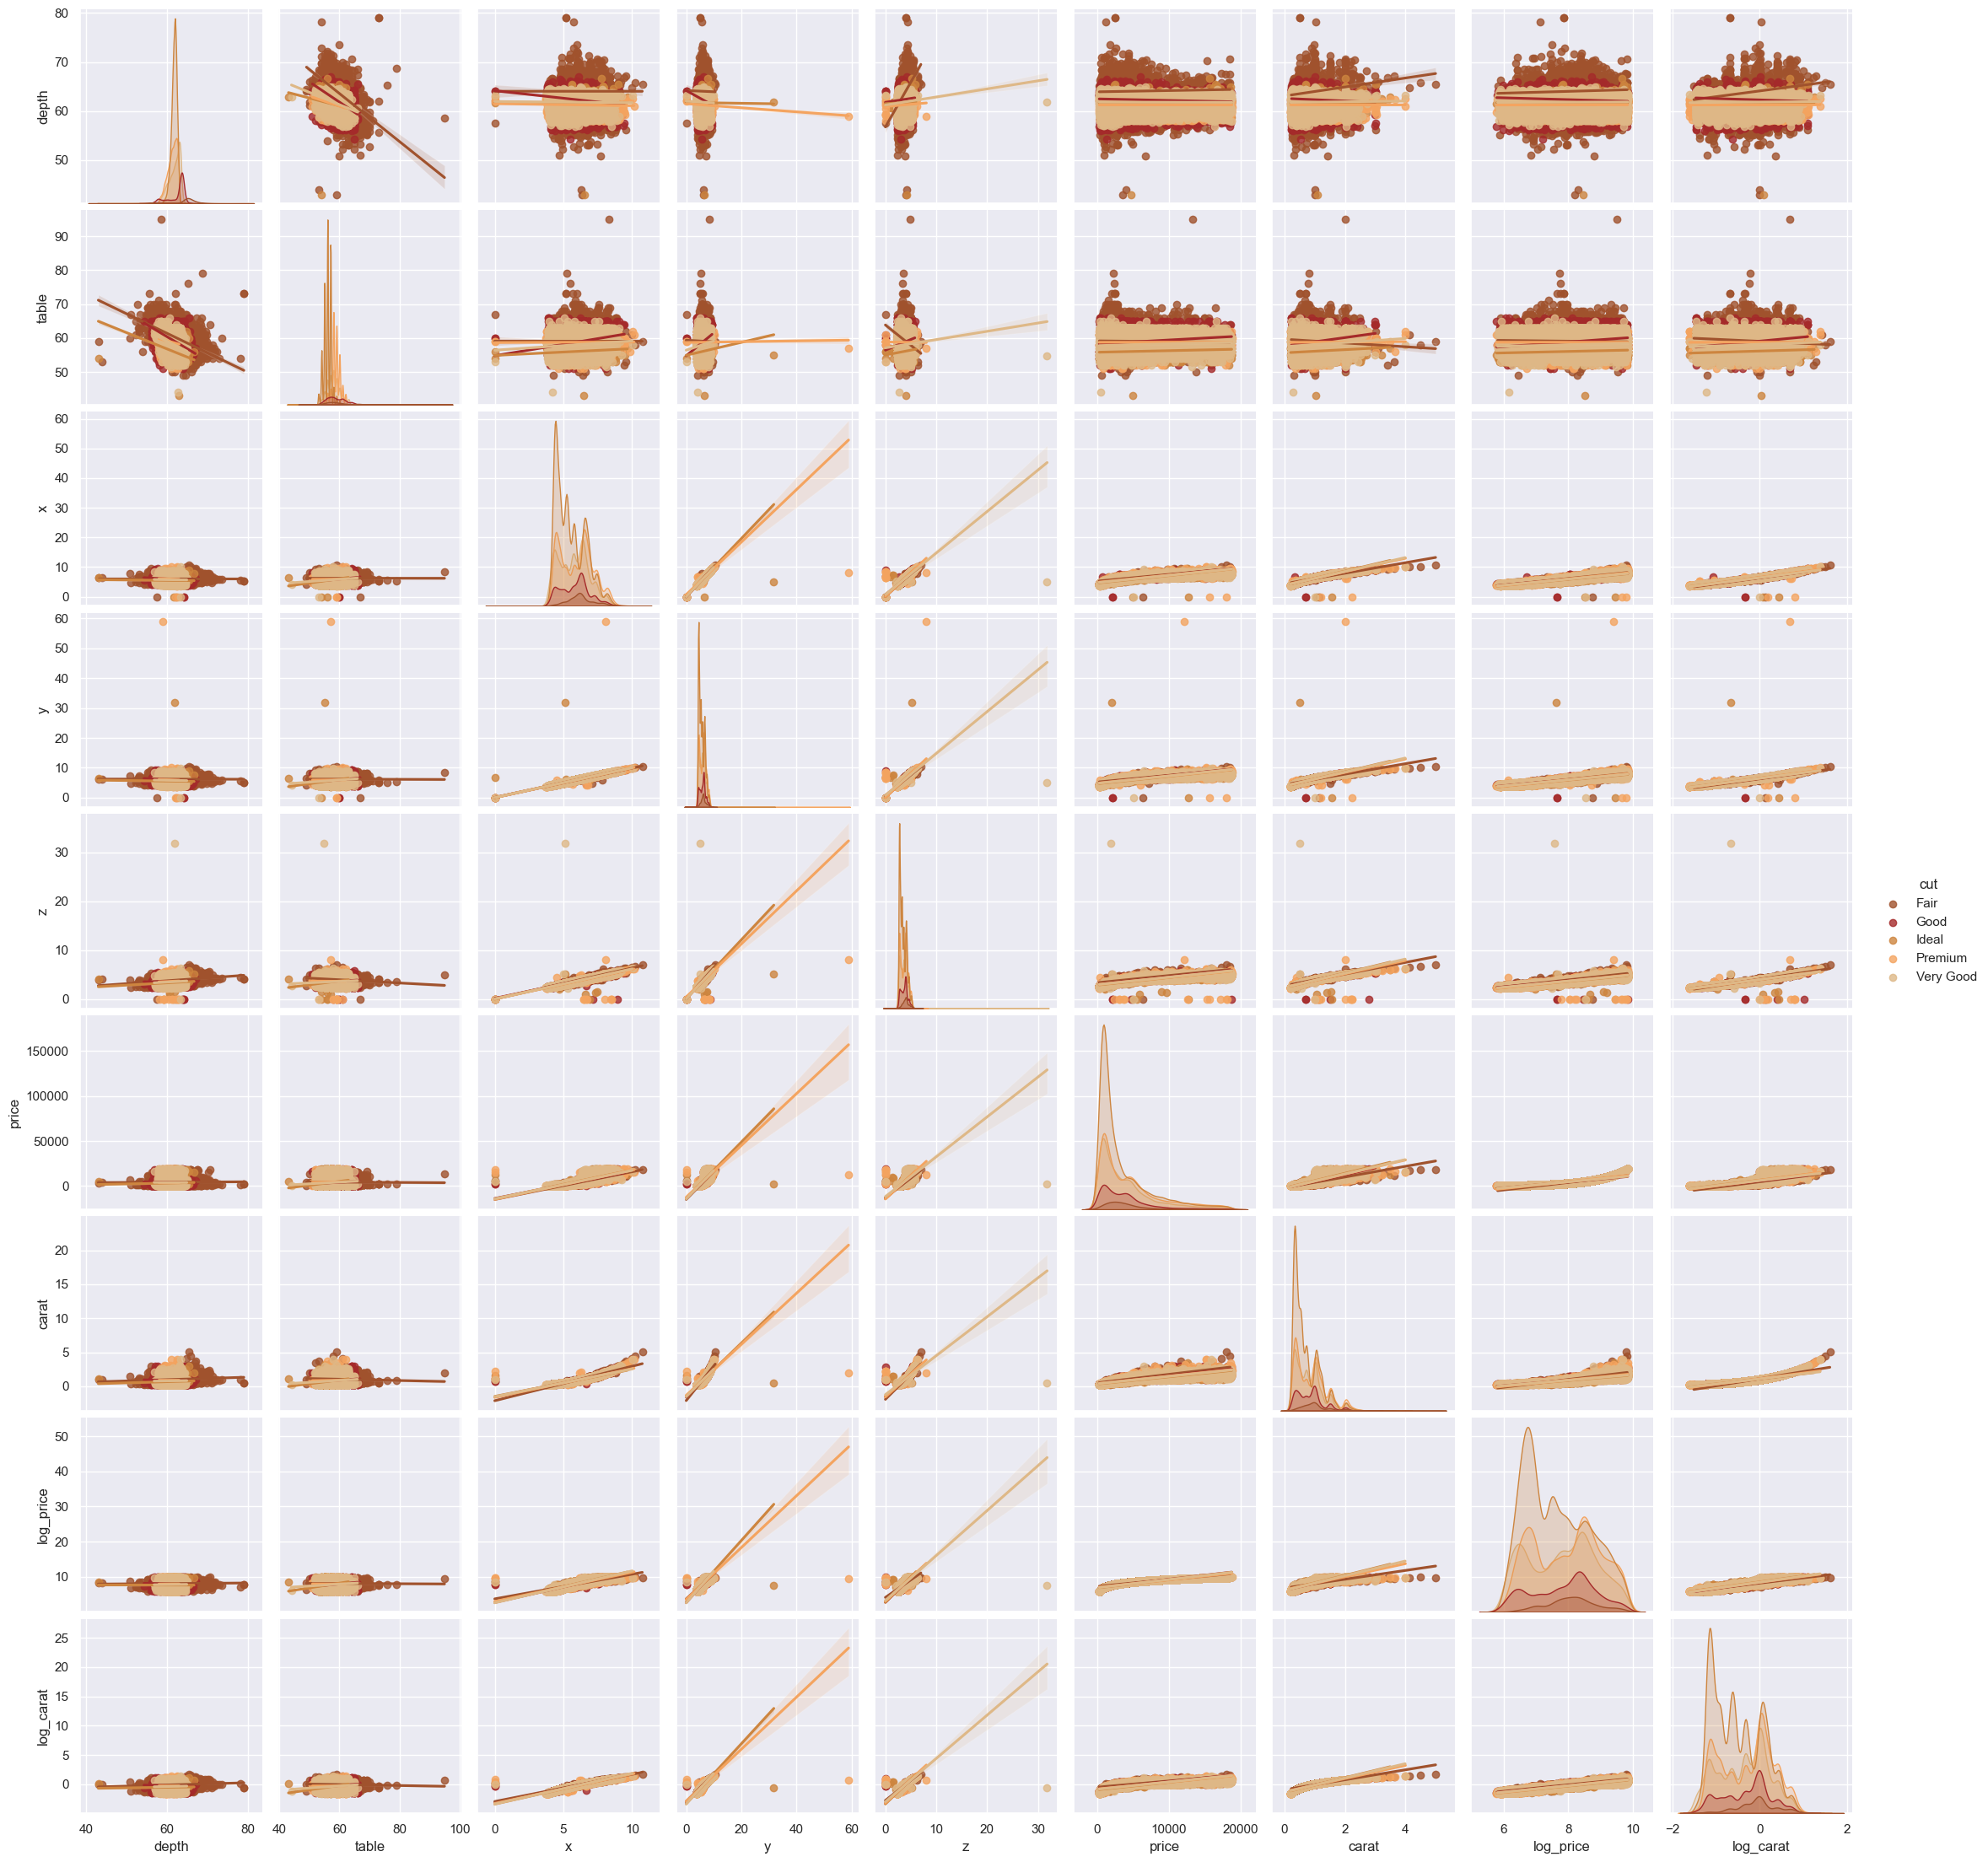

In [72]:
#Doing Bivariate Analysis by examaning a pairplot  
# Define the color palette
cols = ["#A0522D", "#A52A2A", "#CD853F", "#F4A460", "#DEB887"]

# Create the pairplot with regression lines
ax = sns.pairplot(df, hue="cut", palette=cols, kind="reg", diag_kind="kde")

# Show the plot
plt.show()

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
depth,53940.0,61.749405,1.432621,43.000000,61.000000,61.800000,62.500000,79.000000
table,53940.0,57.457184,2.234491,43.000000,56.000000,57.000000,59.000000,95.000000
x,53940.0,5.731157,1.121761,0.000000,4.710000,5.700000,6.540000,10.740000
y,53940.0,5.734526,1.142135,0.000000,4.720000,5.710000,6.540000,58.900000
z,53940.0,3.538734,0.705699,0.000000,2.910000,3.530000,4.040000,31.800000
price,53940.0,3932.799722,3989.439738,326.000000,950.000000,2401.000000,5324.250000,18823.000000
carat,53940.0,0.797940,0.474011,0.200000,0.400000,0.700000,1.040000,5.010000
log_price,53940.0,7.786768,1.014649,5.786897,6.856462,7.783641,8.580027,9.842835
log_carat,53940.0,-0.394967,0.584828,-1.609438,-0.916291,-0.356675,0.039221,1.611436


Under dimensional features of 'x', 'y' & 'z' - min value is 0 thus making such datapoints either a 1D or 2D diamond object which doesn't make much sense - so needs either to be imputed with appropriate value or dropped altogether.

In [77]:
# Removing the data points with 0 value in either 'x', 'y' or 'z'
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)
df.shape

(53920, 12)

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
depth,53920.0,61.749514,1.432331,43.000000,61.000000,61.800000,62.500000,79.000000
table,53920.0,57.456834,2.234064,43.000000,56.000000,57.000000,59.000000,95.000000
x,53920.0,5.731627,1.119423,3.730000,4.710000,5.700000,6.540000,10.740000
y,53920.0,5.734887,1.140126,3.680000,4.720000,5.710000,6.540000,58.900000
z,53920.0,3.540046,0.702530,1.070000,2.910000,3.530000,4.040000,31.800000
price,53920.0,3930.993231,3987.280446,326.000000,949.000000,2401.000000,5323.250000,18823.000000
carat,53920.0,0.797698,0.473795,0.200000,0.400000,0.700000,1.040000,5.010000
log_price,53920.0,7.786393,1.014540,5.786897,6.855409,7.783641,8.579839,9.842835
log_carat,53920.0,-0.395222,0.584737,-1.609438,-0.916291,-0.356675,0.039221,1.611436


In [83]:
# Assuming 'df' is your DataFrame
summary_stats = df.describe()

# Function to calculate IQR bounds
def calculate_outlier_bounds(column):
    Q1 = summary_stats.loc['25%', column]
    Q3 = summary_stats.loc['75%', column]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Dictionary to store the bounds for each column
outlier_bounds = {}

# List of columns to check for outliers
columns_to_check = ['depth', 'table', 'x', 'y', 'z', 'log_price', 'log_carat']

# Calculate and store the bounds
for column in columns_to_check:
    lower, upper = calculate_outlier_bounds(column)
    outlier_bounds[column] = (lower, upper)

# Display the outlier bounds for each variable
for column, bounds in outlier_bounds.items():
    print(f"{column}: Lower bound = {bounds[0]:.2f}, Upper bound = {bounds[1]:.2f}")


depth: Lower bound = 58.75, Upper bound = 64.75
table: Lower bound = 51.50, Upper bound = 63.50
x: Lower bound = 1.96, Upper bound = 9.29
y: Lower bound = 1.99, Upper bound = 9.27
z: Lower bound = 1.22, Upper bound = 5.73
log_price: Lower bound = 4.27, Upper bound = 11.17
log_carat: Lower bound = -2.35, Upper bound = 1.47


In [84]:
# Removing outliers based on the calculated bounds
df = df[(df['depth'] >= 58.75) & (df['depth'] <= 64.75)]
df = df[(df['table'] >= 51.50) & (df['table'] <= 63.50)]
df = df[(df['x'] >= 1.96) & (df['x'] <= 9.29)]
df = df[(df['y'] >= 1.99) & (df['y'] <= 9.27)]
df = df[(df['z'] >= 1.22) & (df['z'] <= 5.73)]

# Check the shape of the dataset after removing outliers
df.shape

(50968, 12)

In [106]:
# Apply one-hot encoding to the categorical variables
categorical_columns = ['cut', 'color', 'clarity']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

# Remove the 'price' and 'carat' columns
df_encoded = df_encoded.drop(columns=['price', 'carat'])

# Display the first few rows of the resulting DataFrame
df_encoded.describe()


,depth,table,x,y,z,log_price,log_carat,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,...,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000,50968.000000
mean,61.782783,57.298118,5.701255,5.705166,3.523354,7.769681,-0.410659,0.077774,0.422147,0.262361,...,0.153508,0.099553,0.051169,0.034355,0.241465,0.164162,0.153488,0.230125,0.070201,0.096080
std,1.111103,2.023958,1.114294,1.107368,0.688024,1.019742,0.584162,0.267819,0.493907,0.439922,...,0.360480,0.299406,0.220345,0.182141,0.427976,0.370426,0.360461,0.420917,0.255488,0.294704
min,58.800000,51.600000,3.730000,3.680000,1.410000,5.786897,-1.609438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.100000,56.000000,4.690000,4.700000,2.890000,6.833032,-0.941609,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61.900000,57.000000,5.670000,5.680000,3.510000,7.760680,-0.356675,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.500000,59.000000,6.530000,6.520000,4.030000,8.576405,0.039221,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,64.700000,63.500000,9.260000,9.250000,5.730000,9.842835,1.115142,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


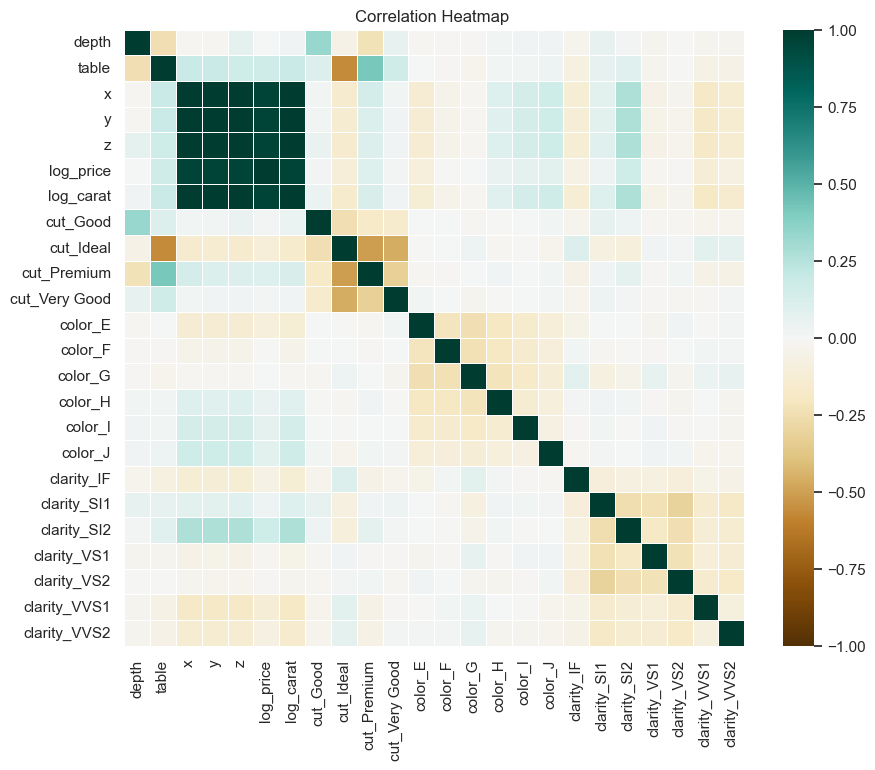

In [113]:

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=False,  fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, cmap='BrBG', )
plt.title('Correlation Heatmap ')
plt.show()

# Features "carat", "x", "y", "z" are highly correlated to our target variable, price.
# Features "cut", "clarity", "depth" are very low correlated (<|0.1|) thus may be removed though due to presence of only few selected features, we won't be doing that.

# Model Building

In [114]:
# Define dependent and independent variables

X = df_encoded.drop(columns=['log_price'])
y = df_encoded['log_price']

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [115]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [116]:
# Initialize an empty list to store cross-validation results for RMSE
cv_results_rms = []

# Iterate over the list of pipelines with their indices
for i, model in enumerate(pipelines):
    # Perform cross-validation using negative RMSE as the scoring metric
    # `cross_val_score` returns an array of scores, one for each fold
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=12)
    
    # Append the cross-validation scores to the results list
    cv_results_rms.append(cv_score)
    
    # Print the model name and the mean RMSE score for the model
    # Multiply by -1 to convert from negative RMSE to positive RMSE
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 0.130853 
Lasso: 1.018890 
DecisionTree: 0.135868 
RandomForest: 0.098588 
KNeighbors: 0.157388 
XGBRegressor: 0.090933 


In [119]:
# So we apply XGVRegressor as it performs best with the lowest negative RMSE score.
pred = pipeline_xgb.predict(X_test)

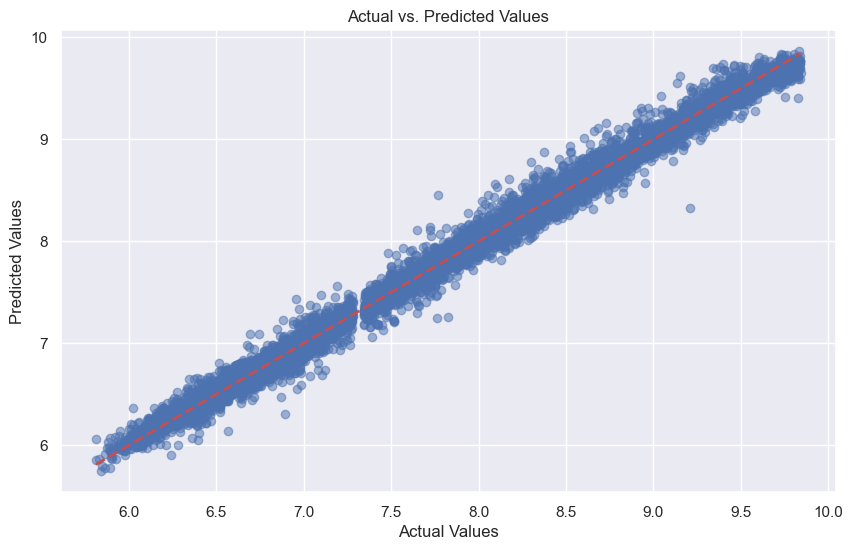

In [128]:
# Plot actual values vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)  # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

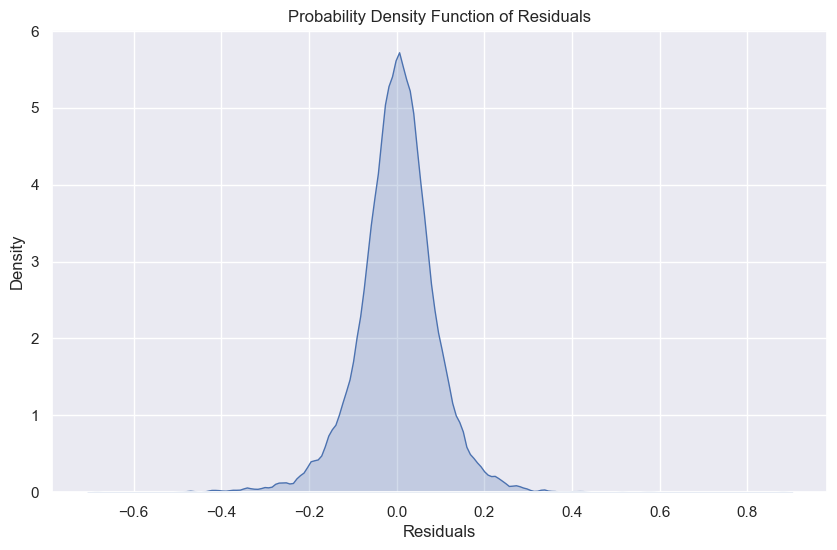

In [130]:
# Calculate residuals
residuals = y_test - pred

# Plot the PDF of residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, bw_adjust=0.5, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Probability Density Function of Residuals')
plt.grid(True)
plt.show()

In [133]:
# Data Frame Performance
# If we take the exponential of the log_prices we will reach the original prices
df_pf = pd.DataFrame(np.exp(pred), columns=['Predictions'])
df_pf

,Predictions
0,4604.887695
1,1355.757690
2,16443.718750
3,1253.022217
4,752.046326
...,...
10189,8672.100586
10190,15732.675781
10191,893.279053
10192,3119.084229


In [132]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,4604.887695,NaN
1,1355.757690,NaN
2,16443.718750,NaN
3,1253.022217,334.0
4,752.046326,335.0
...,...,...
10189,8672.100586,NaN
10190,15732.675781,NaN
10191,893.279053,NaN
10192,3119.084229,NaN


In [134]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.501876
1    7.266129
2    9.722505
3    7.149132
4    6.639876
Name: log_price, dtype: float64

In [135]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,4604.887695,4924.0
1,1355.757690,1431.0
2,16443.718750,16689.0
3,1253.022217,1273.0
4,752.046326,765.0
...,...,...
10189,8672.100586,9007.0
10190,15732.675781,15990.0
10191,893.279053,990.0
10192,3119.084229,3387.0


In [136]:
#Difference Between Predictions and Targets
# Calculate residuals
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predictions']

In [137]:
# Differences in Percentages
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf

,Predictions,Targets,Residual,Difference%
0,4604.887695,4924.0,319.112305,6.480754
1,1355.757690,1431.0,75.242310,5.258023
2,16443.718750,16689.0,245.281250,1.469718
3,1253.022217,1273.0,19.977783,1.569347
4,752.046326,765.0,12.953674,1.693291
...,...,...,...,...
10189,8672.100586,9007.0,334.899414,3.718213
10190,15732.675781,15990.0,257.324219,1.609282
10191,893.279053,990.0,96.720947,9.769793
10192,3119.084229,3387.0,267.915771,7.910120


In [139]:
df_pf.describe()

,Predictions,Targets,Residual,Difference%
count,10194.000000,10194.000000,10194.000000,10194.000000
mean,3896.618408,3919.205121,22.586567,6.586533
std,3927.216797,4000.419826,537.746777,6.440479
min,312.235352,334.000000,-5587.767578,0.002425
25%,903.330475,924.000000,-86.153793,2.272046
50%,2383.924438,2354.000000,3.039337,4.871657
75%,5379.266113,5389.250000,113.278381,8.892830
max,19226.267578,18806.000000,6373.130859,98.107434


In [140]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Targets,Residual,Difference%
5014,1172.97,1173.00,0.03,0.00
9996,572.98,573.00,0.02,0.00
1896,729.95,730.00,0.05,0.01
10113,2694.22,2694.00,-0.22,0.01
6397,1860.84,1861.00,0.16,0.01
...,...,...,...,...
3753,5242.67,3276.00,-1966.67,60.03
5474,1686.86,1047.00,-639.86,61.11
4046,6508.06,4032.00,-2476.06,61.41
9949,7137.14,4345.00,-2792.14,64.26


In [147]:
# Calculate prediction accuracy metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("Model Prediction Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# Calculate percentage error
percentage_error = np.abs((np.exp(y_test) - np.exp(pred)) / np.exp(y_test)) * 100
mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print(f"\nMean Percentage Error: {mean_percentage_error:.2f}%")
print(f"Median Percentage Error: {median_percentage_error:.2f}%")

Model Prediction Accuracy Metrics:
Mean Absolute Error (MAE): 0.0654
Mean Squared Error (MSE): 0.0081
Root Mean Squared Error (RMSE): 0.0899
R-squared (R²) Score: 0.9923
Adjusted R^2: 0.9922588768761363

Mean Percentage Error: 6.59%
Median Percentage Error: 4.87%
